Q3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #loading data

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape[1:]) #looking at the shape 

(28, 28)


In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [5]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /= 255.0
test_data /= 255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,))) #changing to tanh
model.add(Dense(512, activation='tanh')) #changing to tanh
model.add(Dense(512, activation='tanh')) #changing to tanh. Additional layer added

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 0.5784 - accuracy: 0.8204 - val_loss: 0.2102 - val_accuracy: 0.9380
Epoch 2/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1934 - accuracy: 0.9412 - val_loss: 0.1937 - val_accuracy: 0.9400
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1090 - accuracy: 0.9666 - val_loss: 0.1122 - val_accuracy: 0.9653
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.1057 - val_accuracy: 0.9677
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.1001 - val_accuracy: 0.9674
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0713 - val_accuracy: 0.9778

In [7]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data: Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9788
Evaluation result on Test Data: Loss = 0.072825588285923, accuracy = 0.9787999987602234


In [8]:
def get_plot(history): #plot function 
#accuracy graph
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#loss and valdation loss graph
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

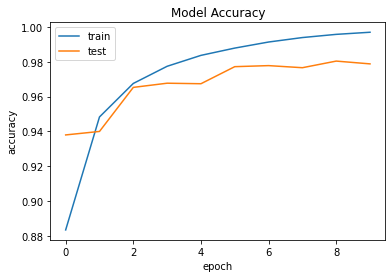

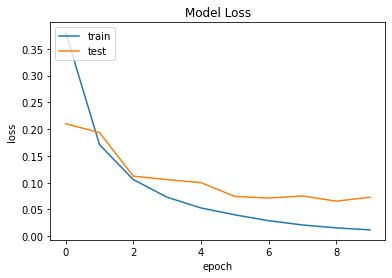

In [9]:
get_plot(history)

4. Run the same code without scaling the images and check the performance?

In [ ]:
#convert data to float and scale values between 0 and 1
'''train_data = train_data.astype('float')
test_data = test_data.astype('float')'''

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
model2 = Sequential()
model2.add(Dense(512, activation='tanh', input_shape=(dimData,))) #changing to tanh
model2.add(Dense(512, activation='tanh')) #changing to tanh
model2.add(Dense(512, activation='tanh')) #changing to tanh. Additional layer added

model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 9s 38ms/step - loss: 0.6392 - accuracy: 0.8062 - val_loss: 0.3534 - val_accuracy: 0.8891
Epoch 2/10
235/235 [==============================] - 9s 37ms/step - loss: 0.1732 - accuracy: 0.9470 - val_loss: 0.1678 - val_accuracy: 0.9481
Epoch 3/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0991 - accuracy: 0.9688 - val_loss: 0.1178 - val_accuracy: 0.9630
Epoch 4/10
235/235 [==============================] - 9s 37ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.1009 - val_accuracy: 0.9697
Epoch 5/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0896 - val_accuracy: 0.9719
Epoch 6/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.1363 - val_accuracy: 0.9585
Epoch 7/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.0863 - val_accuracy: 0.9749

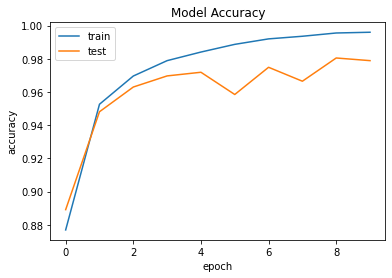

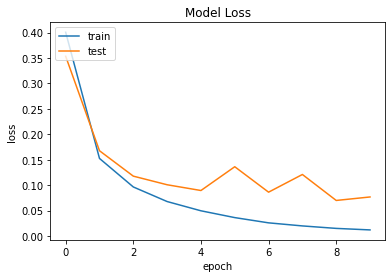

In [ ]:
get_plot(history_2)